# Illustration of bootstrap results in a heatmap

This script creates a dataframe of the bootstrap results of all conditions and produces a heatmap for illustration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pickle
from scipy import spatial
from scipy.spatial import distance
import scipy.stats as st
import os
import copy

Load bootstrapped means

In [2]:
ofc1_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc1', allow_pickle=True)
ofc2_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc2', allow_pickle=True)
ofc3_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc3', allow_pickle=True)
ofc4_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc4', allow_pickle=True)
ofc5_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc5', allow_pickle=True)
ofc6_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc6', allow_pickle=True)
ofc7_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_ofc7', allow_pickle=True)
fp2_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_fp2', allow_pickle=True)
r25_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_25', allow_pickle=True)
s32_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_s32', allow_pickle=True)
p24ab_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_p24ab', allow_pickle=True)
p24c_df= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_p24c', allow_pickle=True)
r33_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_33', allow_pickle=True)
p32_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_p32', allow_pickle=True)
s24_df = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_s24', allow_pickle=True)
caudate_df= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_caudate', allow_pickle=True)
putamen_df= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_putamen', allow_pickle=True)
nacc_df= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/bootstrap_nacc', allow_pickle=True)

In [3]:
ofc5_df

,Ketamine,Placebo,Ketamine-Placebo
0,0.026217,0.032381,-0.013975
1,0.039968,0.024899,0.002723
2,0.030117,0.051882,-0.004156
3,0.032648,0.002377,-0.009841
4,0.034711,0.044550,-0.011076
...,...,...,...
49995,0.028923,0.027364,-0.008733
49996,0.027995,0.040077,-0.000746
49997,0.026010,0.022416,-0.024882
49998,0.025811,0.036298,-0.025776


In [4]:
ofc5_df.mean()

Ketamine            0.028571
Placebo             0.036810
Ketamine-Placebo   -0.008188
dtype: float64

mean of the bootstrap

In [5]:
ofc1_mean = ofc1_df.mean()
ofc2_mean = ofc2_df.mean()
ofc3_mean = ofc3_df.mean()
ofc4_mean = ofc4_df.mean()
ofc5_mean = ofc5_df.mean()
ofc6_mean = ofc6_df.mean()
ofc7_mean = ofc7_df.mean()
fp2_mean = fp2_df.mean()
r25_mean = r25_df.mean()
s32_mean = s32_df.mean()
p24ab_mean = p24ab_df.mean()
p24c_mean = p24c_df.mean()
r33_mean = r33_df.mean()
p32_mean = p32_df.mean()
s24_mean = s24_df.mean()
caudate_mean = caudate_df.mean()
putamen_mean = putamen_df.mean()
nacc_mean = nacc_df.mean()

In [6]:
# Nested dictionary: for outer layer Ketamine, Placebo and Ketamine-Placebo
# inner layer: 
bootstrap_mean_dict = {}
roi_val_dict = {}
roi_keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 'FP2', '25', 's24', 's32','33', 'p24ab', 'p24c', 'p32', 'Putamen', 'NAcc', 'Caudate']
keys = ['Ketamine', 'Placebo', 'Ketamine-Placebo']
roi_list = [ofc1_mean, ofc2_mean, ofc3_mean, ofc4_mean, ofc5_mean, ofc6_mean, ofc7_mean, fp2_mean, r25_mean,  s24_mean, s32_mean, r33_mean, p24ab_mean, p24c_mean, p32_mean, putamen_mean, nacc_mean, caudate_mean]

# loop through all conditions
for key in keys:
    i=0
    #print(key)
    # loop through all ROIs
    for entry in roi_list:
        #print(entry)
        roi_name=roi_keys[i]
        # fill inner dictionary: {ROI:mean_bootstrap}
        roi_val_dict[roi_name] = entry[key]
        i+=1
    # fill outer dictionary: {Conditon: {inner dictionary}}    
    # make deepcopy!
    bootstrap_mean_dict[key] = copy.deepcopy(roi_val_dict)



data is the mean of the bootstrapped distribution of distances to centroids

In [7]:
data = pd.DataFrame.from_dict(bootstrap_mean_dict, orient='columns')

In [8]:
data

,Ketamine,Placebo,Ketamine-Placebo
OFC1,-0.075028,0.173223,-0.248329
OFC2,-0.067749,0.054651,-0.122642
OFC3,-0.056228,-0.081116,0.025109
OFC4,0.271208,-0.123769,0.394567
OFC5,0.028571,0.036810,-0.008188
OFC6,-0.068323,-0.143067,0.074404
OFC7,0.048689,-0.198885,0.247545
FP2,-0.011758,0.054781,-0.067041
25,0.150915,0.122445,0.027673
s24,0.293345,-0.373783,0.666738


In [9]:
data.to_pickle('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Bootstrap/Bootstrap_mean_dict')

In [10]:
data

,Ketamine,Placebo,Ketamine-Placebo
OFC1,-0.075028,0.173223,-0.248329
OFC2,-0.067749,0.054651,-0.122642
OFC3,-0.056228,-0.081116,0.025109
OFC4,0.271208,-0.123769,0.394567
OFC5,0.028571,0.036810,-0.008188
OFC6,-0.068323,-0.143067,0.074404
OFC7,0.048689,-0.198885,0.247545
FP2,-0.011758,0.054781,-0.067041
25,0.150915,0.122445,0.027673
s24,0.293345,-0.373783,0.666738


In [11]:
np.amin(data)

Ketamine           -0.303732
Placebo            -0.373783
Ketamine-Placebo   -0.347393
dtype: float64

In [11]:
np.amin(data)

Ketamine           -0.303732
Placebo            -0.373783
Ketamine-Placebo   -0.347393
dtype: float64

In [13]:
np.amax(data)

Ketamine            0.801139
Placebo             0.234210
Ketamine-Placebo    0.979142
dtype: float64

<IPython.core.display.Javascript object>


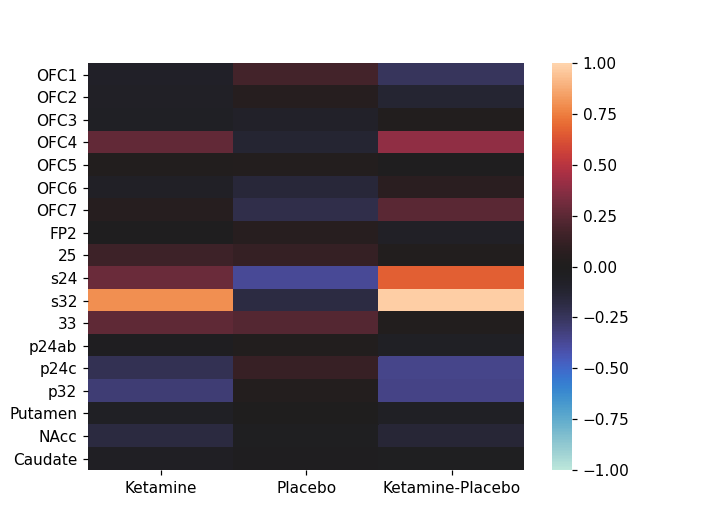

In [14]:
%matplotlib notebook
sns.heatmap(data, vmin=-1, vmax=1, center=0)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Heatmap_Within_Bootstrap_correct', dpi=250)

<IPython.core.display.Javascript object>


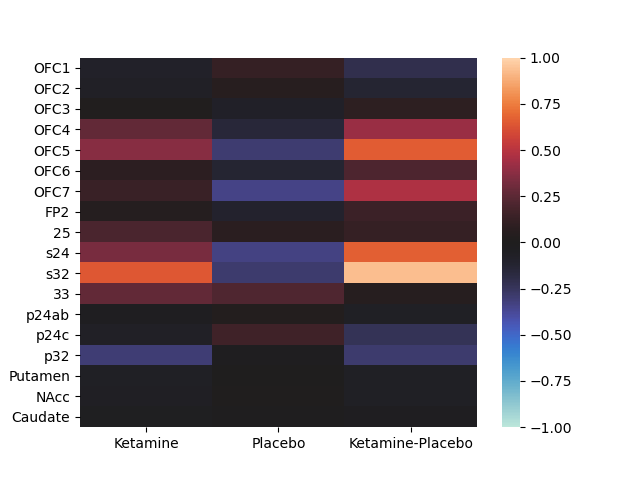

In [24]:
%matplotlib notebook
sns.heatmap(data, vmin=-1, vmax=1, center=0)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Heatmap_Within_Bootstrap', dpi=250)

<IPython.core.display.Javascript object>


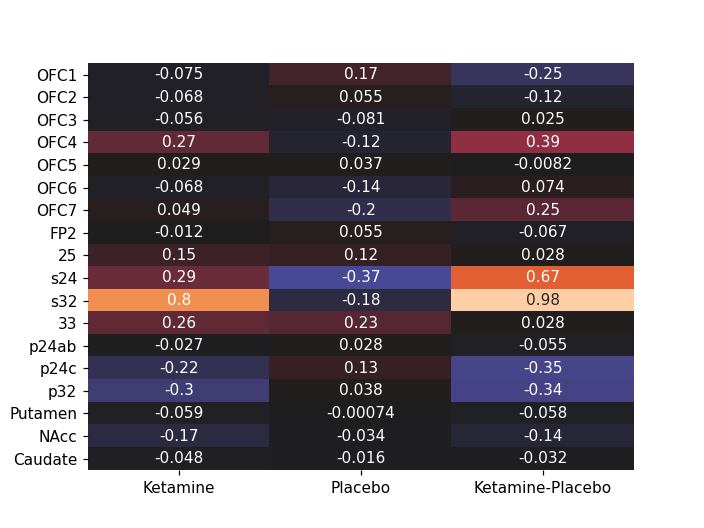

In [15]:
%matplotlib notebook
sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cbar=False)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Heatmap_Within_Bootstrap_annot_right_Labeling', dpi=250)

Choosing s32 and s24 for further between ROI region analysis

<IPython.core.display.Javascript object>


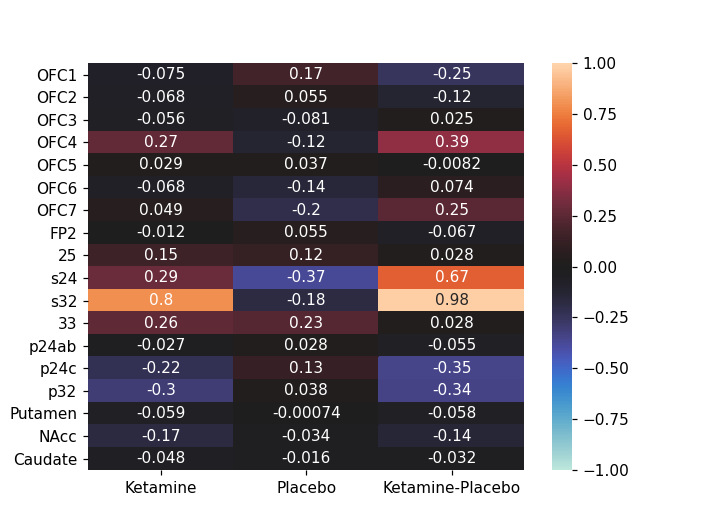

In [17]:
%matplotlib notebook
sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Heatmap_Within_Bootstrap_annot_bar_right_Labeling', dpi=250)

<IPython.core.display.Javascript object>


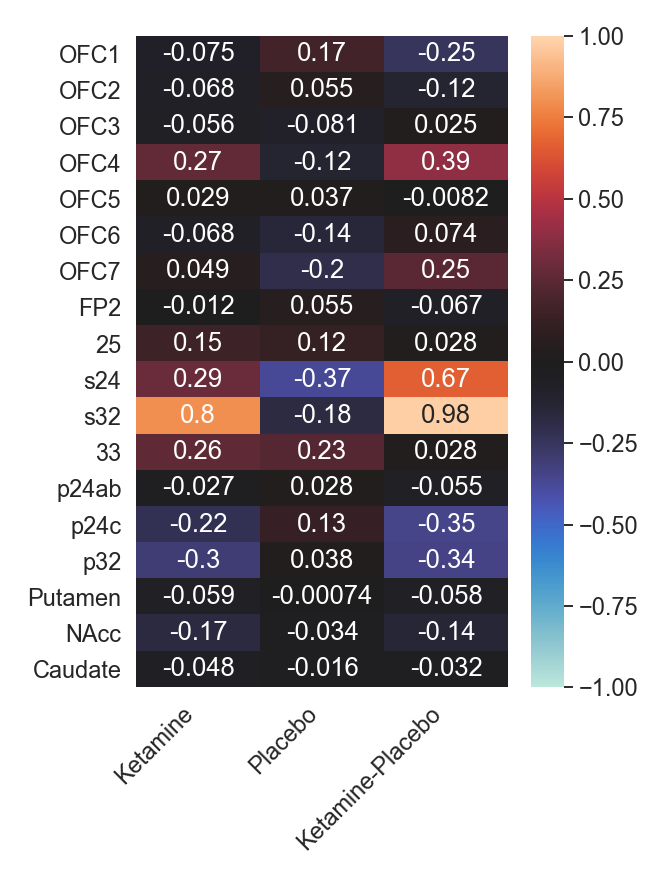

In [40]:
%matplotlib notebook
sns.set_context("paper")
sns.set(font_scale=1.4)
plt.figure(figsize=(6,8))

ax=sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True)
#ax.set_yticklabels(rotation)
plt.xticks(rotation=45, horizontalalignment='right') 
#sns.despine(offset=5)
plt.tight_layout()
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Heatmap_Within_Bootstrap_new', dpi=250)